In this project, I will be using datasets with ratings on movies from a site called MovieLens. 
The datasets were available on this page: https://grouplens.org/datasets/movielens/
The dataset that I specifically worked with was the latest "small" subset, with over 100,000 ratings applied by about 600 users to around 9000 different movies.


In [338]:
#First, I'll load in the datasets that I want to use

import numpy as np
import pandas as pd
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth
import matplotlib.pyplot as plt

df1 = pd.read_csv(r'ml-latest-small/ratings.csv')
df2 = pd.read_csv(r'ml-latest-small/movies.csv')

total = pd.merge(df1, df2)

total

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,Bloodmoon (1997),Action|Thriller
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action|Crime|Drama
100833,610,160836,3.0,1493844794,Hazard (2005),Action|Drama|Thriller
100834,610,163937,3.5,1493848789,Blair Witch (2016),Horror|Thriller


Text(0, 0.5, 'Number of Ratings')

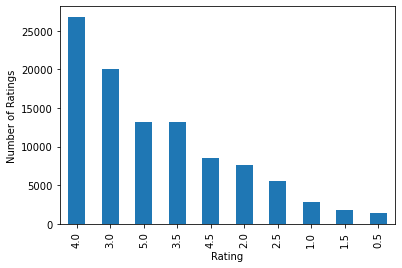

In [339]:
total['rating'].value_counts().plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')

(array([0., 1., 2., 3., 4., 5., 6.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

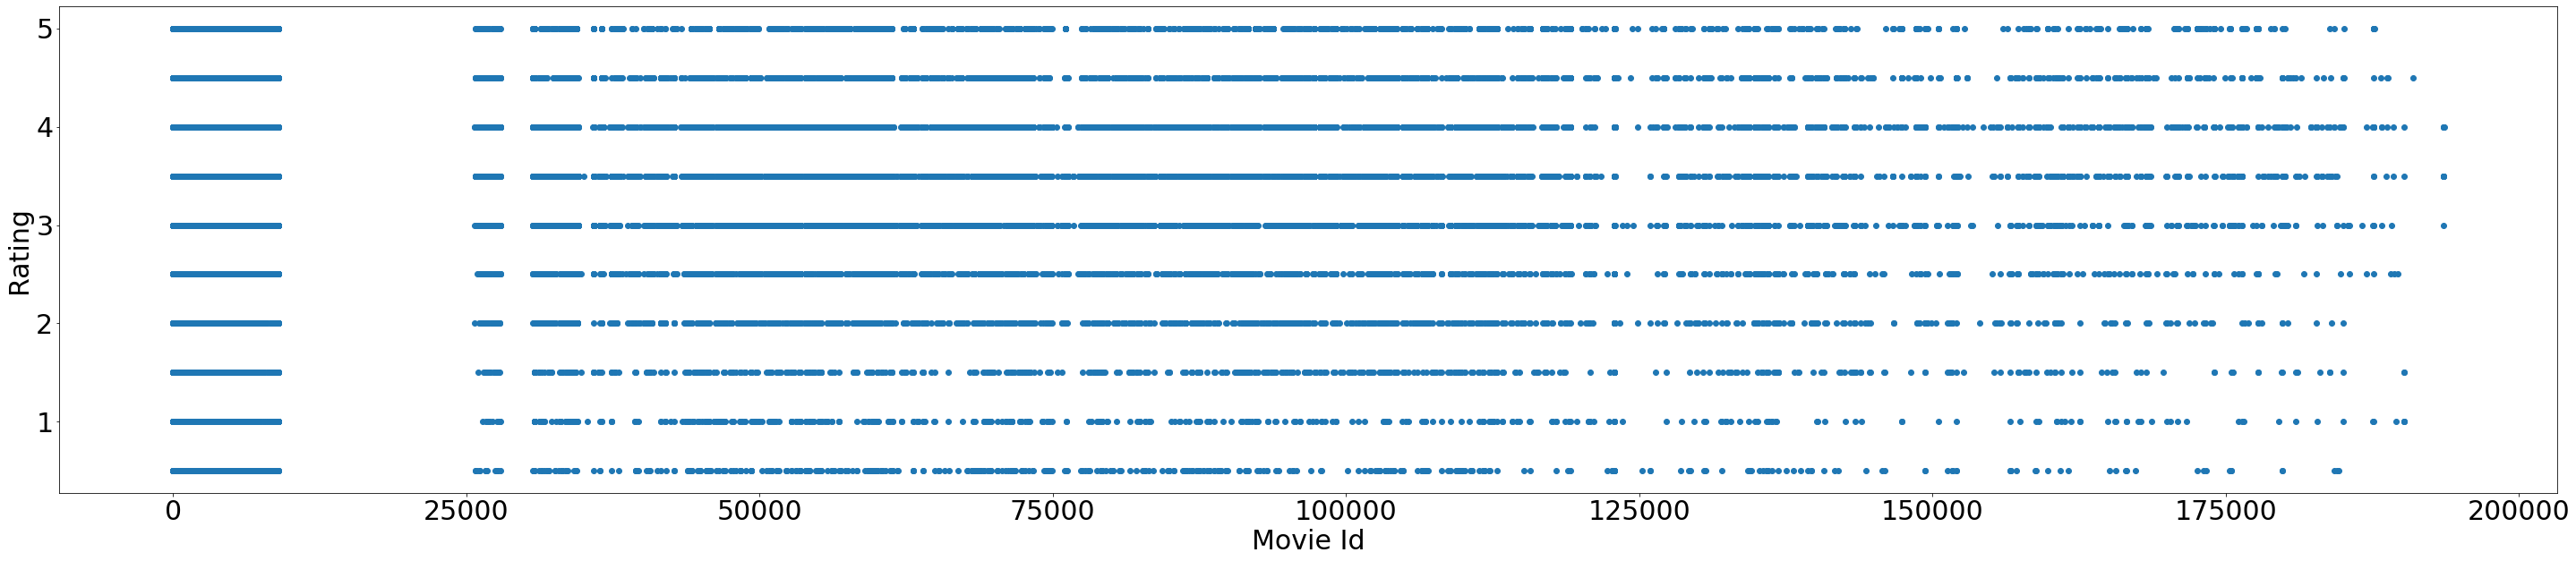

In [340]:
plt.figure(figsize = (50,10))
plt.scatter(total['movieId'], total['rating'])
plt.xlabel('Movie Id', fontsize=30)
plt.ylabel('Rating', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

Since the amount of analysis that can be done with the current dataset is a bit limited, one idea is to onehot encode the 'genres' column to provide for a better way to analyze each genre individually

In [341]:
#Next, I'll want to make a list of all of the genres (including duplicates)
line_genres = total['genres'].apply(lambda x: x.split('|'))
genres_list = line_genres.tolist()

In [342]:
#Now I'll append each genre in genres_list to a set in order to get rid of any duplicate values
genres_set = set()
for genres in genres_list:
    for genre in genres:
        genres_set.add(genre)
genres_set

{'(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [343]:
for genres in genres_set:
    total[genres] = 0 #all entries in each genre column are designated as 0 before they are filled in
    genre_check = total['genres'].str.contains(genres, regex=False)
    total.loc[genre_check == True, [genres]] = 1 #for each column where the encoded genre appears, a 1 will be filled in to the corresponding column

total


,userId,movieId,rating,timestamp,title,genres,Crime,Western,(no genres listed),Horror,...,Adventure,Thriller,Mystery,War,Comedy,Musical,Action,Children,Film-Noir,Romance
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,Bloodmoon (1997),Action|Thriller,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action|Crime|Drama,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
100833,610,160836,3.0,1493844794,Hazard (2005),Action|Drama|Thriller,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
100834,610,163937,3.5,1493848789,Blair Witch (2016),Horror|Thriller,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0


In [344]:
#This is where I code for the 'Year' column. I initially make the column with a 0 to make sure any movies that don't have a specified year at least have some kind of entry

total['Year'] = 0 
year_check = total['title'].str.endswith(')') #This is a way to check if the title ends with a year, since all specified years are contained within parentheses
total.loc[year_check == True, ['Year']] = total['title'].str[-5:-1]

total = total.drop(['timestamp'], axis=1)
total['Year'] = total['Year'].astype('int')
total

,userId,movieId,rating,title,genres,Crime,Western,(no genres listed),Horror,Documentary,...,Thriller,Mystery,War,Comedy,Musical,Action,Children,Film-Noir,Romance,Year
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1995
1,5,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1995
2,7,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1995
3,15,1,2.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1995
4,17,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100831,610,160341,2.5,Bloodmoon (1997),Action|Thriller,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1997
100832,610,160527,4.5,Sympathy for the Underdog (1971),Action|Crime|Drama,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1971
100833,610,160836,3.0,Hazard (2005),Action|Drama|Thriller,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,2005
100834,610,163937,3.5,Blair Witch (2016),Horror|Thriller,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,2016


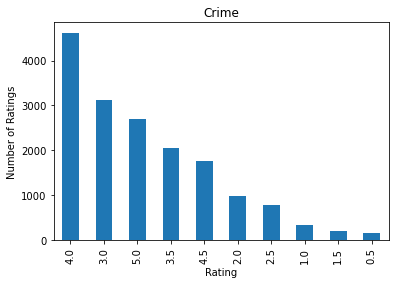

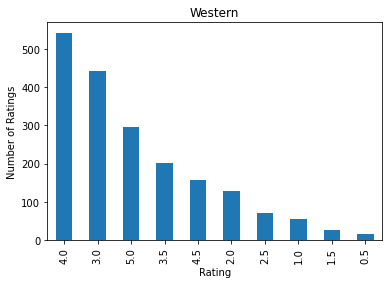

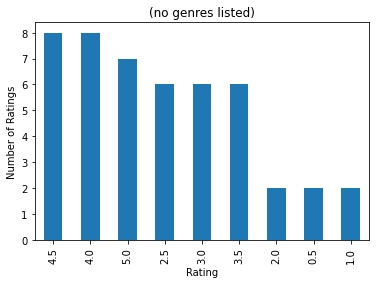

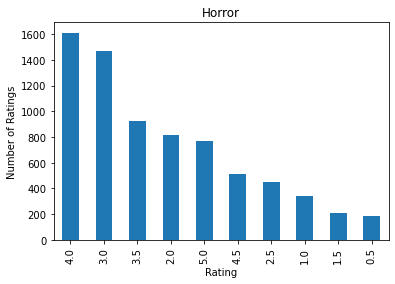

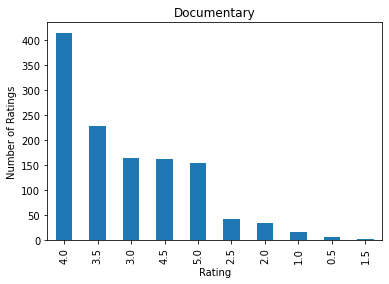

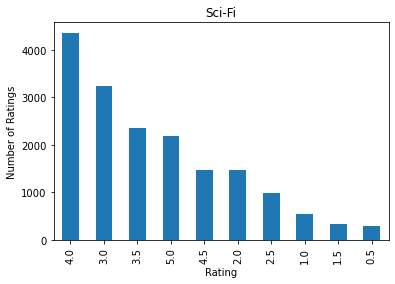

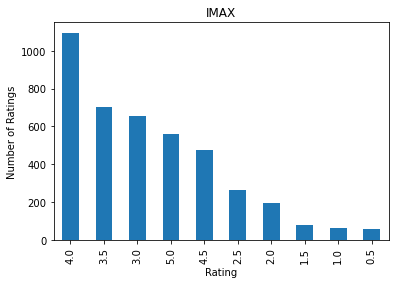

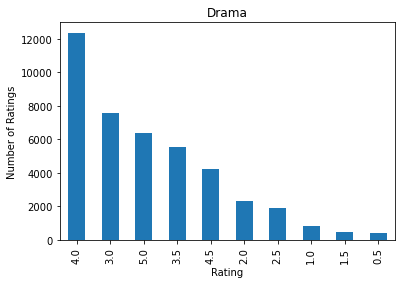

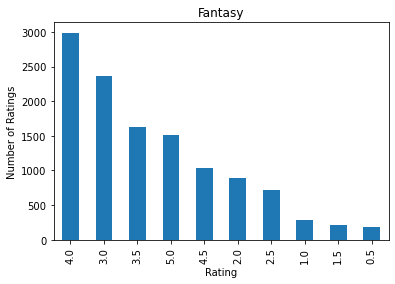

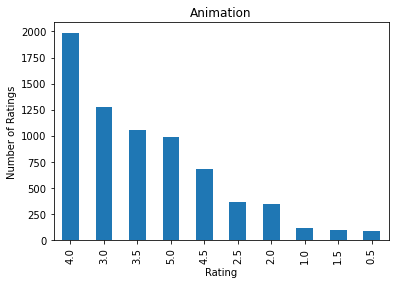

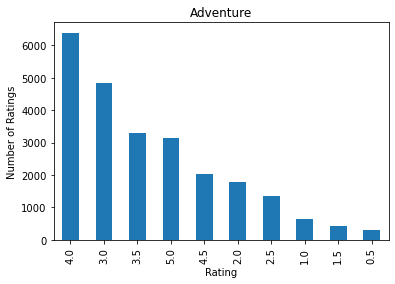

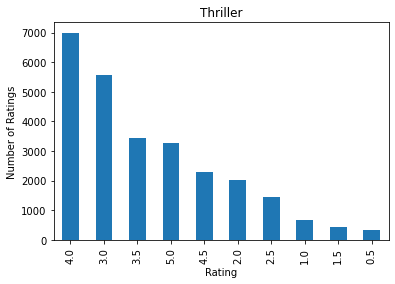

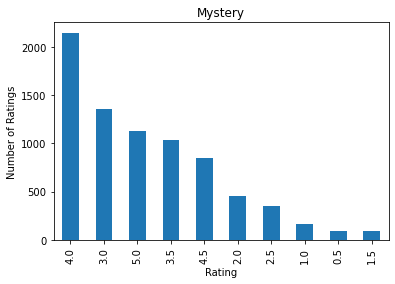

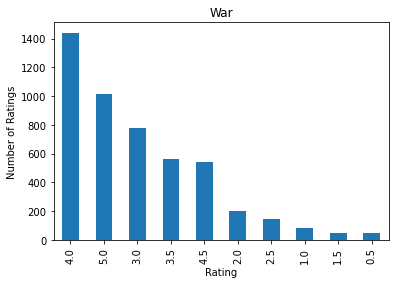

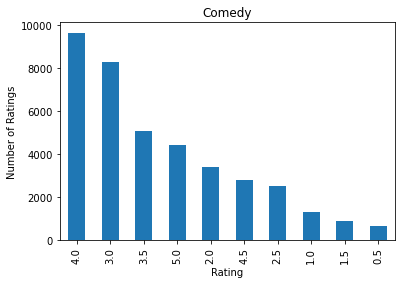

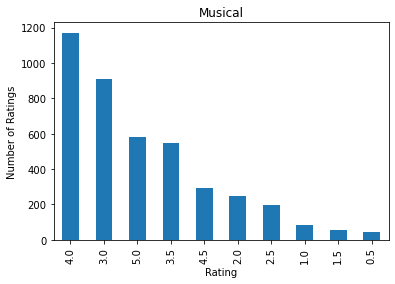

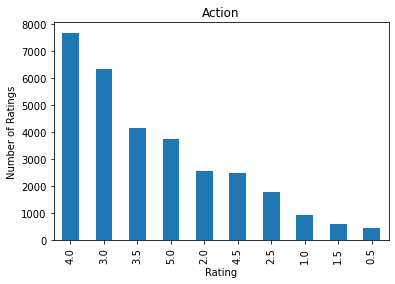

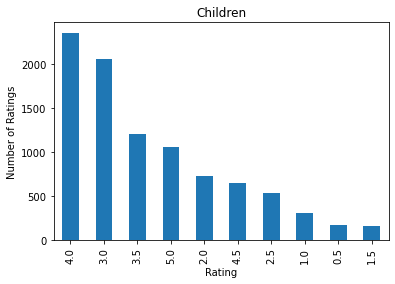

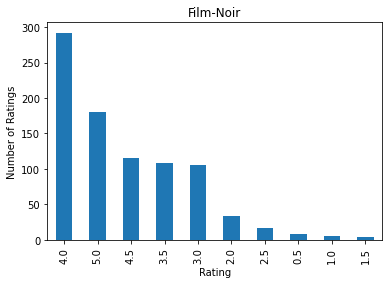

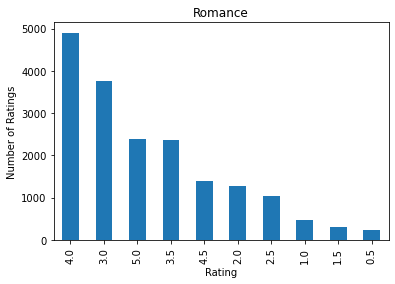

In [345]:
for genres in genres_set:
    genre_check = total['genres'].str.contains(genres, regex=False)
    individual = total.loc[genre_check]
    individual['rating'].value_counts().plot(kind='bar', title=genres)
    plt.xlabel('Rating')
    plt.ylabel('Number of Ratings')
    plt.show()

#Here, I wanted to get a grip on if there was a specific window of ratings for each genre of movie. From what I can tell, there does not seem to be a specific pattern.

I will now train a model using K-means. Since this is an easy-to-use algorithm, I wanted to use it first to test the waters for the analysis of this dataset. The I will primarily use the number of clusters for this method given to me with the well-known elbow analysis. I also used 300 for the maximum number of iterations, as the model may take a while to train given the fact that the onehot encoding of the movie genre gave a large number of columns. 

In [346]:
# test_set = total.drop(['title', 'userId', 'rating', 'genres'], axis=1)
test_set = total.drop(['title', 'userId', 'genres'], axis=1)
#I had also heard that the numpy arrays also play a bit more nicely with k-means
test_set = test_set.to_numpy()

elbow=[]
for a in range(1,10):
    kmeans=KMeans(n_clusters=a, init='k-means++', max_iter=600)
    kmeans.fit(test_set)
    elbow.append(kmeans.inertia_)

<function matplotlib.pyplot.show(close=None, block=None)>

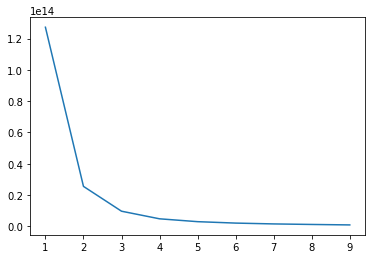

In [347]:
plt.plot(range(1,10),elbow)
plt.show

#it looks like 3 clusters will be the best number of clusters to use for my current dataset

In [348]:
km = KMeans(n_clusters=3, max_iter=600, init='k-means++')
#For the test set in this model, I primarily wanted to pit the ratings up against the genre and year, so I excluded the information below to acomplish that.
test_set = total.drop(['title', 'userId', 'movieId', 'genres'], axis=1)

#I had also heard that the numpy arrays also play a bit more nicely with k-means
test_set = test_set.to_numpy()


In [349]:
fit1 = km.fit_predict(test_set)
fit1

array([0, 0, 0, ..., 0, 0, 0])

In [350]:
total['cluster'] = fit1
total

,userId,movieId,rating,title,genres,Crime,Western,(no genres listed),Horror,Documentary,...,Mystery,War,Comedy,Musical,Action,Children,Film-Noir,Romance,Year,cluster
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1995,0
1,5,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1995,0
2,7,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1995,0
3,15,1,2.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1995,0
4,17,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1995,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100831,610,160341,2.5,Bloodmoon (1997),Action|Thriller,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1997,0
100832,610,160527,4.5,Sympathy for the Underdog (1971),Action|Crime|Drama,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1971,2
100833,610,160836,3.0,Hazard (2005),Action|Drama|Thriller,0,0,0,0,0,...,0,0,0,0,1,0,0,0,2005,0
100834,610,163937,3.5,Blair Witch (2016),Horror|Thriller,0,0,0,1,0,...,0,0,0,0,0,0,0,0,2016,0


<function matplotlib.pyplot.legend(*args, **kwargs)>

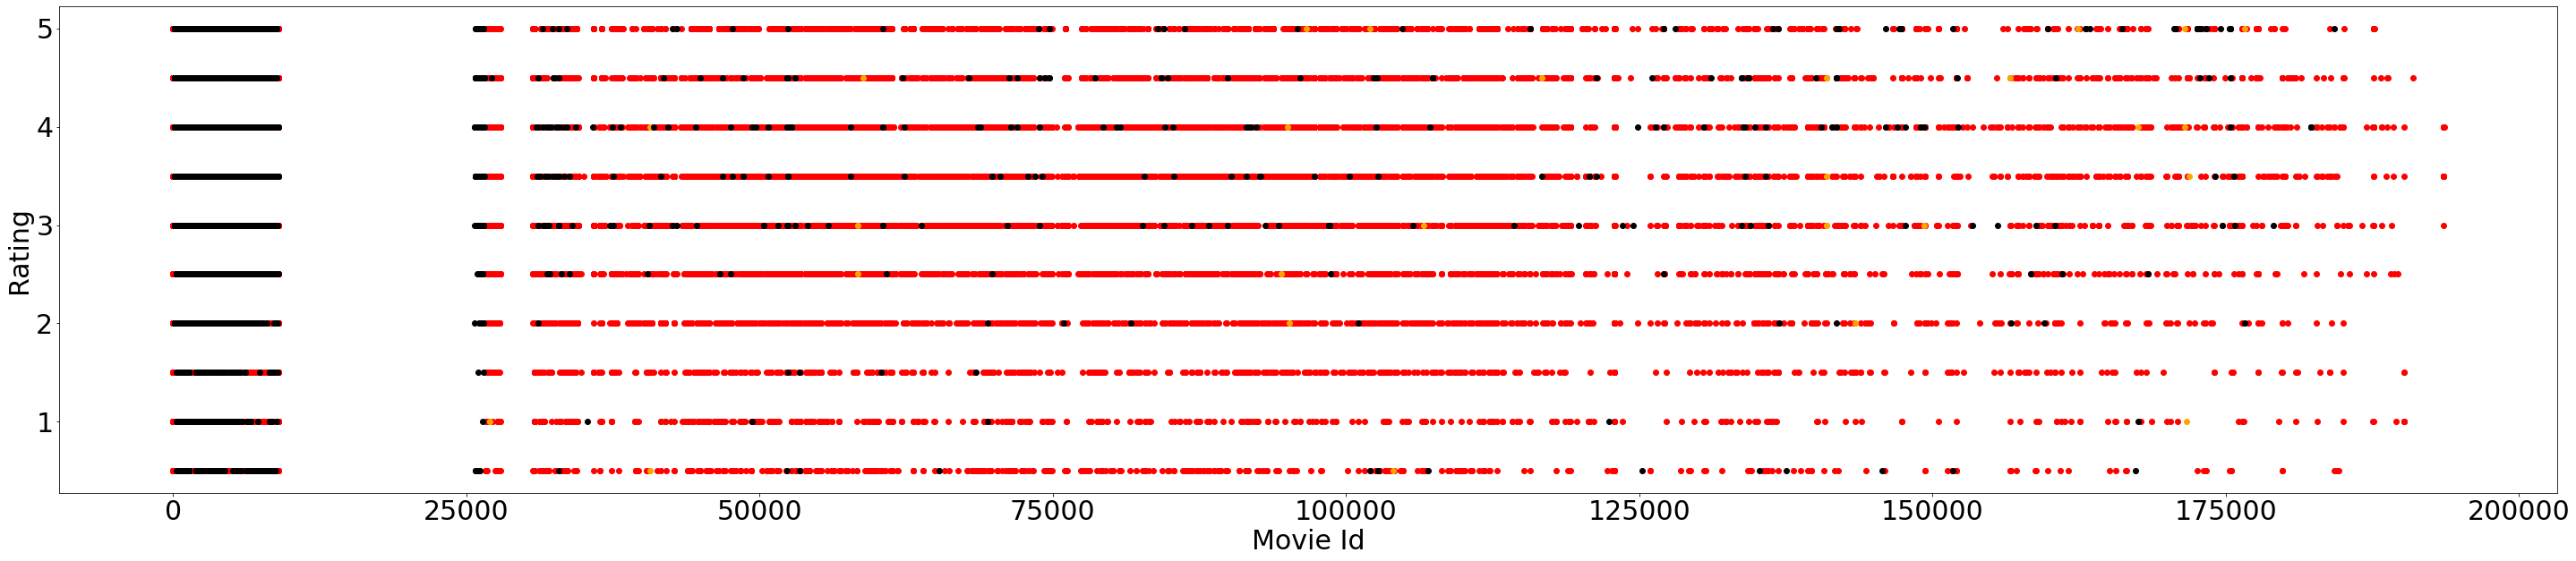

In [351]:
plt.figure(figsize = (50,10))
df0 = total[total.cluster==0]
df1 = total[total.cluster==1]
df2 = total[total.cluster==2]


plt.scatter(df0['movieId'], df0['rating'], color='red')
plt.scatter(df1['movieId'], df1['rating'], color='orange')
plt.scatter(df2['movieId'], df2['rating'], color='black')


plt.xlabel('Movie Id', fontsize=30)
plt.ylabel('Rating', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend()

It would appear as though K-means does not do a great job of choosing clusters with the limited amount of ratings used (0.5 scale). Even with the onehot encoded genres, the K-means method only appears to split by Movie Id. A way to potentially fix the problems with this model is to make a kind of similarity function that notes the distance between the genres. If the distances between the genres are noted, then the genres will carry more weight when the clusters are divided. A genreal flaw for this dataset when being analyzed by K-means is that the dataset is very dense, as there are many duplicate ratings for a given movie. As a result, a density-based algorithm might be better for this dataset.

The next algorithm that I wish to attempt is mean shift. I primarily wish to use this method in order to try a density-based method, as there are plenty of duplicates for each movie ID.

In [ ]:
total = total.drop(['cluster'], axis=1)

In [353]:
#for the test set, I did not exclude the movie Id like the last round of analysis as a result of a mix up. Instead of excluding the movie Id, I had excluded the rating by mistake. At this point, the model had already run through most of its iterations and would have taken too much time to redo
#If I had time for another run of this model, I would have replaced 'rating' with 'movieId'.
test_set = total.drop(['title', 'userId', 'rating', 'genres'], axis=1)

bandwidth = estimate_bandwidth(test_set)

In [ ]:
ms = MeanShift(bandwidth=bandwidth, max_iter=200)
ms.fit(test_set)
#The default for the amount of iterations was 300. This level was taking too long, so I had tried 50 iterations instead. The level of 50 iterations was done in a short amount of time, but gave bad clustering, so I put the level back up to 200.
#The 200 iterations version of my code unfortunately did not finish either, so the code below was the code that I was using to plot my attempt from 50 iterations.


In [ ]:
labels = ms.labels_
centers = ms.cluster_centers_

all_labels = pd.unique(labels)
cluster_count = len(all_labels)
all_labels

In [ ]:
total['cluster'] = labels

plt.figure(figsize = (50,10))
df0 = total[total.cluster==0]
df1 = total[total.cluster==1]
df2 = total[total.cluster==2]
df3 = total[total.cluster==3]
df4 = total[total.cluster==4]

plt.scatter(df0['movieId'], df0['rating'], color='red')
plt.scatter(df1['movieId'], df1['rating'], color='orange')
plt.scatter(df2['movieId'], df2['rating'], color='black')
plt.scatter(df3['movieId'], df2['rating'], color='blue')
plt.scatter(df4['movieId'], df2['rating'], color='violet')




plt.xlabel('Movie Id', fontsize=30)
plt.ylabel('Rating', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)




Overall, this method suffered from a lack of intuitive feature engineering as well, since there was not a good way to categorize the similarity of each genre. If I had made more effective use of my time, I would have run this series at a more efficient number of iterations and with the appropriate features.